### Knock51: 決定木Model を構築しよう

In [2]:
# Data の読み込み
from sklearn.datasets import load_boston

boston = load_boston()

import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# 説明変数・目的変数の割合
X = df[boston.feature_names]
y = df[['MEDV']]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
# 訓練 Data・Test Data の分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape[0])
display(X_train.head())
print(X_test.shape[0])
display(X_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


決定木
`sklearn.DecisionTreeRegressor` Class を使用する。
※ 分類では `sklearn.DecisionTreeClassifier` を使用する。

In [5]:
# 決定木Model の構築
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train, y_train)
    # max_depth= ･･･ 決定木の層の深さの上限値を設定

[Text(775.0, 539.0, 'X[5] <= 6.797\nmse = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(387.5, 385.0, 'X[12] <= 14.405\nmse = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(193.75, 231.0, 'X[7] <= 1.474\nmse = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(96.875, 77.0, 'mse = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(290.625, 77.0, 'mse = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(581.25, 231.0, 'X[0] <= 5.782\nmse = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(484.375, 77.0, 'mse = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(678.125, 77.0, 'mse = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(1162.5, 385.0, 'X[5] <= 7.435\nmse = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(968.75, 231.0, 'X[0] <= 7.393\nmse = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(871.875, 77.0, 'mse = 19.597\nsamples = 43\nvalue = 32.465'),
 Text(1065.625, 77.0, 'mse = 6.997\nsamples = 4\nvalue = 14.325'),
 Text(1356.25, 231.0, 'X[10] <= 18.3\nmse = 42.031\nsamples = 23\nvalue = 44.709'),
 Text(1259.37

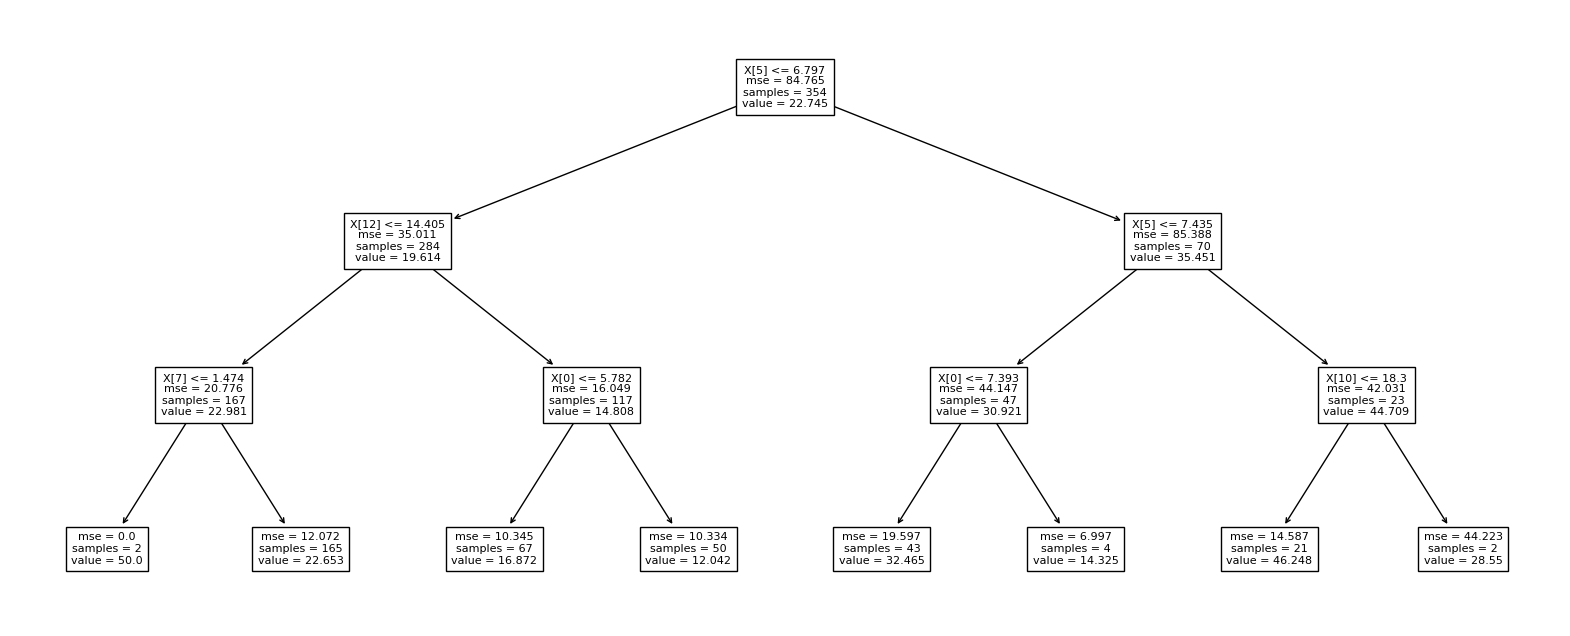

In [6]:
# Tree の表示
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
tree.plot_tree(tree_reg, fontsize=8)

#### 各 Node の中身
- X[n] <= m
    次の Node への条件分岐
- mse
    Node の不純度（value と実測値の平均二乗誤差）
- samples
    Node に含まれる Data 件数
- value
    Node に含まれる Data の平均値